# Numpy, Matplotlib og Pandas

Relevante XKCD comics:

* [Hvor mye tid en kan spare på automatisering](https://xkcd.com/1205/).
* [Hvor mye tid en kan bruke på automatisering](https://xkcd.com/1319/).

## Numpy

En av de viktigste modulene til tallbehandling er `numpy`. Den har en del av de samme funksjonene som `math`, men har en veldig viktig ting vi ikke har hatt så langt: `array`. Et array er litt som en liste eller tuple, men noen forskjeller. En kan ikke legge til eller trekke fra verdier. Lager en et array med 12 verdier, vil det fortsette å ha 12 verdier, litt som en tuple. Du kan derimot endre/oppdatere verdiene inni arrayet, som i en liste.

Numpy-arrays har to store fordeler:

1. Du kan gjøre de vanlige operasjonene på arrayet som en helhet. Dvs. at `2 * array` ganger alle tallene i arrayet med 2, i stedet for å lage en dobbelt så langt liste.
2. Det er ekstremt mye raskere enn en Python-liste.

Først må vi importere `numpy`. Det er en ekstern modul, så vi må installere den med Thonny sin pakke-manager. Vi importerer ofte (alltid) `numpy as np`, så vi slipper å skrive så mye.

In [1]:
import numpy as np

In [2]:
# Punkt 1.

# liste
liste = [1, 2, 3]
liste = 2 * liste
print(liste)

# array
array = np.array([1, 2, 3])
array = 2 * array
print(array)

[1, 2, 3, 1, 2, 3]
[2 4 6]


Som vi ser, gjør numpy-arrayet det vi vil. Litt mer å skrive for å lage det, men worth it veldig raskt.

Her skal vi se forskjellen på tiden det tar å gange en stor liste/array med et tall.

Ps. Koden under er litt uforståelig, men resultatet/printen er det viktigste her, så bare hopp over koden. :)

In [3]:
# Punkt 2.
import timeit

# liste
kode_liste = '''
ny_liste = []
for num in liste:
    ny_liste.append(num * 2)
'''

print('liste:', timeit.timeit(
    setup = 'liste = list(range(10_000))',
    stmt = kode_liste,
    number = 1_000
), 's')

# array
kode_array = '''
nytt_array = 2 * array
'''

print('numpy-array:', timeit.timeit(
    setup = 'import numpy as np\narray = np.array(list(range(10_000)))',
    stmt = kode_array,
    number = 1_000
), 's')

liste: 0.2567996249999851 s
numpy-array: 0.0031252919870894402 s


Akkurat hvordan `timeit`-modulen funker er ikke det viktige her. Det vi ser er at numpy-arrayet gjør gangingen omtrent 100 ganger så raskt. Dette gjelder generelt med numpy-arrays. De er kjemperaske, og burde absolutt brukes hvis det er snakk om store mengder tall, i lister eller tabeller.

Som vist, kan vi lage en liste om til et array, ved å skrive noe sånt som:

```
liste = [1, 2, 3]
array = np.array(liste)
```

Numpy lar oss også lage nye arrays etter noen regler. Noen nyttige er f.eks. `np.arange` og `np.linspace`, som funker litt som `range`. `arange` gjør det samme som `range`, men du _kan_ burke komma-steglengde. Altså `np.arange(0, 1, 0.1)` gir deg verdiene `0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9`. `linspace` gjør det samme, men i stedet for at det tredje tallet er steglengde, er det _antall_ steg. I.e. setter du det til 10, får du 10 steg delt jevnt fra 0 til 1. Ofte vil vi sette det til en mer, altså 11, fordi vi vil ha med begge endene.

In [4]:
np.arange(0, 1, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [5]:
np.linspace(0, 1, 10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [6]:
np.linspace(0, 1, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

Trenger vi f.eks. en liste/array med kommatall fra -5 til 5, og vi vil ha 1000 verdier, sånn at det blir så jevnt som mulig, kan vi skrive:

`np.linspace(-5, 5, 1000)`

Tidligere så vi på følgende eksempel.

In [7]:
def f(x):
    y = x**2
    return y


X = [0, 1, 2, 3, 4, 5]
Y = []
for x in X:
    y = f(x)
    Y.append(y)

print(X)
print(Y)

[0, 1, 2, 3, 4, 5]
[0, 1, 4, 9, 16, 25]


Dette funker fint, men vi kan endre det litt (masse) ved å bare bruke numpy-arrays. Ikke bare kan vi kjøre funksjonen direkte på numpy-arrayet, som vist under...

In [8]:
def f(x):
    y = x**2
    return y


X = np.array([0, 1, 2, 3, 4, 5])
Y = f(X)

print(X)
print(Y)

[0 1 2 3 4 5]
[ 0  1  4  9 16 25]


... men siden funksjonen er enkel, kan vi også bare opphøye arrayet i 2:

In [9]:
X = np.array([0, 1, 2, 3, 4, 5])
Y = X**2

print(X)
print(Y)

[0 1 2 3 4 5]
[ 0  1  4  9 16 25]


Blam! Masse linjer spart. Og hadde listen med tall vært større, hadde numpy-arrayet vært myyyye raskere!

## Matplotlib

En annen essensiell modul er `matplotlib`. Den er også ekstert, og må derfor installeres.

Matplotlib (ikke mathplotlib) er en modul som tegner alt mulig av grafer/plots for oss. Importeringen er stygg, og derfor legger vi ofte (alltid) til `as plt`. Vi importerer derfor som følger.

In [10]:
import matplotlib.pyplot as plt

Teknisk sett importerer vi her under-modulen `pyplot`, men den har det meste av funksjonaliteten vi bruker (men ikke all).

Nå har vi allerede laget `X` og `Y` fra tidligere oppgaver, og vi kan plotte de så enkelt som dette.

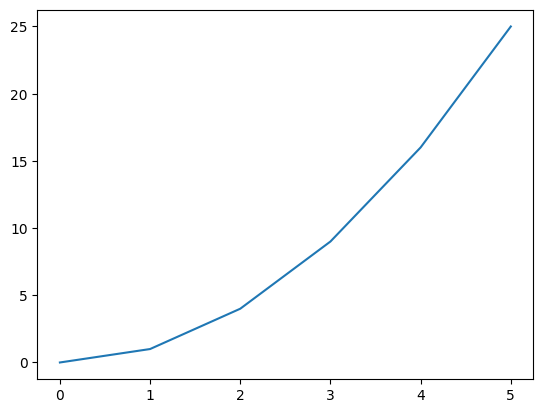

In [11]:
plt.plot(X, Y)
plt.show()

I en del programmer (f.eks. Jupyter Notebook, men ikke Thonny) trenger vi ikke å kjøre `plt.show()` heller, men noen stedet må en, så jeg har vendt meg til å gjøre det overalt.

Vi kan se at plottet vårt ble litt hakkete, og det er fordi vi bare har 11 punkter. Vi kan lage en ny en, med `numpy`, med flere punkter. Jeg bruker `np.linspace` til å generere et array med 1000 punkter.

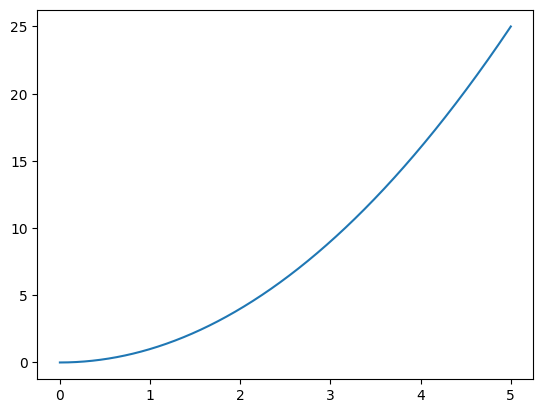

In [12]:
X = np.linspace(0, 5, 1000)
Y = X**2

plt.plot(X, Y)

Fin og jevn plot. :D

Matplotlib støtter maaaaaaaange typer plots, og du kan finne verdens lengde liste med kopierbare eksempler [her](https://matplotlib.org/stable/gallery/index.html). De viktigste å kunne er nok vanlig linje-plott (`plt.plot()`) og stolpediagram/bar chart (`plt.bar()`).

<BarContainer object of 6 artists>

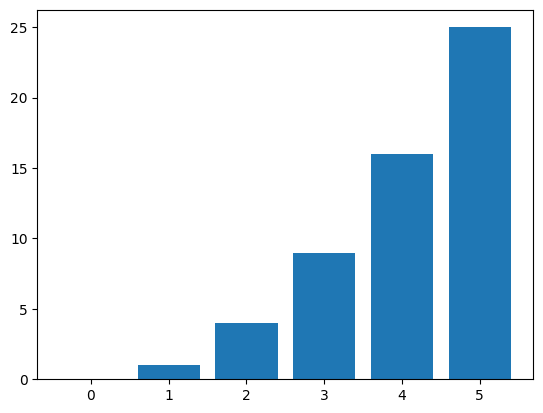

In [13]:
plt.bar([0, 1, 2, 3, 4, 5], [0, 1, 4, 9, 16, 25])

Vi kan selvfølgelig også bruke tall fra f.eks. selskap-inntekt-oppgaven fra forrige uke.

<BarContainer object of 5 artists>

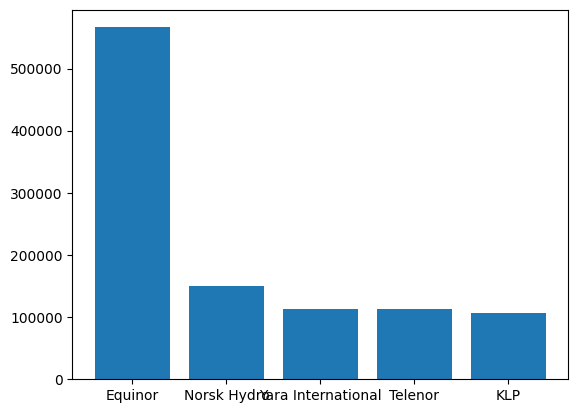

In [14]:
selskap = ['Equinor', 'Norsk Hydro', 'Yara International', 'Telenor', 'KLP']
inntekt = [566342, 149766, 113837, 113666, 106634]

plt.bar(selskap, inntekt)

Nå kan vi hente ut selskapene med `inntekt_dict.keys()` og inntektene med `inntekt_dict.values()`, og så kan vi plotte de. :D

Litt sånn avhengig av hvilke program du kjører i, kan en også zoome, flytte rundt og ta screenshot med en interaktiv versjon. Vi kan også lagre bildene vi får direkte, ved å kjøre `plt.savefig(filnavn.png)`.

## Pandas

Dette faget viser basicen av det en kan gjøre med programmering, men det er jo veldig mye mer en kan lære å ta i bruk. Et eksempel på en modul som _ikke_ er pensum, og dermed _ikke_ kommer på eksamen, men allikevel er veldig nyttig, er `pandas`. Pandas er en modul som lar en jobbe effektivt med regneark (Excel o.l.), csv-filer og andre datasett og tabeller.

Ta selskap-inntekt-oppgaven fra forrige tidligere øving. Der vi hadde en fil med selskaper og inntektene deres. Den kan vi også løse med pandas. Å lage dataen om til en dict, kan gjøres enkelt som dette:

In [15]:
import pandas as pd

pd.read_csv('Data/revenue2020.txt', header=None, names=['Selskap', 'Inntekt']).to_dict('records')

[{'Selskap': 'Yara', 'Inntekt': 123456},
 {'Selskap': 'Kiwi', 'Inntekt': 654321},
 {'Selskap': 'NTNU', 'Inntekt': 122333}]

Blam! En linje! :D :D :D :D :D
Ok, så er det ikke heeelt riktig. Dicten er en litt annen form enn det vi egentlig skulle ha. Om det er superviktig, kan vi bruke noen flere linjer på å gjøre det riktig.

In [16]:
df = pd.read_csv('Data/revenue2020.txt', header=None, names=['Selskaper', 'Inntekt']).T
df.columns = df.iloc[0]
df = df.drop(df.index[0]).to_dict('records')[0]
df

{'Yara': 123456, 'Kiwi': 654321, 'NTNU': 122333}

Minus importering og utskrift, var det ca 3 linjer med kode. :D Vi brukte over 20 linjer uten pandas. Greit nok, det var noen lange, kompliserte linjer der, men fortsatt veldig få.

Poenget er hvertfall, at pandas lar en behandle data, datasett og regneark veldig raskt og effektivt. Kjempekult og nyttig verktøy, men dessverre ikke pensum.

Eller så kan vi bare beholde det som en Pandas dataframe (`df`), som ofte er en bedre måte å lagre data.

In [17]:
df = pd.read_csv('Data/revenue2020.txt', header=None, names=['Selskaper', 'Inntekt'])
df

Selskaper  Inntekt
0      Yara   123456
1      Kiwi   654321
2      NTNU   122333

Pen tabell!